# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns

## Read csv File

In [2]:
df_train = pd.read_csv('kdd_train.csv')
df_test = pd.read_csv('kdd_test.csv')

In [3]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [5]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [6]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
df_test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [9]:
df_train.describe(include = 'all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
count,125973.00000,125973,125973,125973,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973
unique,NaN,3,70,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,102689,40338,74945,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67343
mean,287.14465,NaN,NaN,NaN,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,NaN
std,2604.51531,NaN,NaN,NaN,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,NaN
min,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.00000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.00000,NaN,NaN,NaN,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.00000,NaN,NaN,NaN,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,NaN


In [10]:
df_train['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [11]:
le = preprocessing.LabelEncoder()

In [12]:
df_train.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,-0.401084,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219


In [13]:
df_train['labels'] = pd.Categorical(df_train['labels'])
categories = df_train['labels'].cat.categories
df_test['labels'] = pd.Categorical(df_test['labels'], categories)

df_train['labels'] = df_train['labels'].cat.codes
df_test['labels'] = df_test['labels'].cat.codes

In [14]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [15]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,11
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,11
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,11
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,11
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,15


In [16]:
df_train['protocol_type'] = pd.Categorical(df_train['protocol_type'])
categories = df_train['protocol_type'].cat.categories
df_test['protocol_type'] = pd.Categorical(df_test['protocol_type'], categories)

df_train['protocol_type'] = df_train['protocol_type'].cat.codes
df_test['protocol_type'] = df_test['protocol_type'].cat.codes

In [17]:
df_train['service'] = pd.Categorical(df_train['service'])
categories = df_train['service'].cat.categories
df_test['service'] = pd.Categorical(df_test['service'], categories)

df_train['service'] = df_train['service'].cat.codes
df_test['service'] = df_test['service'].cat.codes

In [18]:
df_train['flag'] = pd.Categorical(df_train['flag'])
categories = df_train['flag'].cat.categories
df_test['flag'] = pd.Categorical(df_test['flag'], categories)

df_train['flag'] = df_train['flag'].cat.codes
df_test['flag'] = df_test['flag'].cat.codes

In [19]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11


In [20]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,1,54,9,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,11
1,0,2,12,9,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,11
2,0,2,12,9,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,11
3,1979,2,44,9,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,11
4,14462,1,44,4,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,15


In [21]:
corr = df_train.corr()
corr

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
duration,1.000000,0.038241,0.092858,-0.063390,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,0.134590
protocol_type,0.038241,1.000000,0.029994,0.093668,-0.000974,-0.000608,-0.001757,0.169535,-0.000965,-0.011857,...,0.103919,0.001702,0.131380,-0.209105,-0.356183,-0.079398,-0.077925,-0.015434,-0.046938,0.135203
service,0.092858,0.029994,1.000000,-0.304014,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064066,...,-0.407696,-0.452696,0.284072,-0.111163,-0.156211,0.281635,0.277594,0.150666,0.148405,-0.001798
flag,-0.063390,0.093668,-0.304014,1.000000,-0.008114,-0.004096,-0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,-0.283607,0.195689,0.073773,-0.443441,-0.443225,-0.683310,-0.718778,0.170749
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.011617
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.007600
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.017239
wrong_fragment,-0.009866,0.169535,0.084404,0.067214,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,0.304125
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.003513
hot,0.000705,-0.011857,-0.064066,0.068437,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,0.098611


In [22]:
corr['labels']

duration                       0.134590
protocol_type                  0.135203
service                       -0.001798
flag                           0.170749
src_bytes                      0.011617
dst_bytes                      0.007600
land                          -0.017239
wrong_fragment                 0.304125
urgent                        -0.003513
hot                            0.098611
num_failed_logins             -0.024052
logged_in                      0.104056
num_compromised                0.000346
root_shell                    -0.009355
su_attempted                   0.004005
num_root                       0.001718
num_file_creations             0.003004
num_shells                     0.000743
num_access_files               0.005220
num_outbound_cmds                   NaN
is_host_login                  0.000400
is_guest_login                 0.109112
count                          0.060380
srv_count                      0.310819
serror_rate                   -0.361326


In [23]:
corr['labels'].nlargest(n=15)

labels                         1.000000
srv_count                      0.310819
wrong_fragment                 0.304125
dst_host_diff_srv_rate         0.295042
same_srv_rate                  0.258357
diff_srv_rate                  0.228557
dst_host_same_src_port_rate    0.202229
flag                           0.170749
dst_host_srv_count             0.138848
protocol_type                  0.135203
duration                       0.134590
is_guest_login                 0.109112
dst_host_rerror_rate           0.108057
dst_host_srv_rerror_rate       0.106217
logged_in                      0.104056
Name: labels, dtype: float64

In [24]:
corr['labels'].nsmallest(n=6)

dst_host_srv_serror_rate      -0.368981
srv_serror_rate               -0.368207
dst_host_serror_rate          -0.361695
serror_rate                   -0.361326
dst_host_srv_diff_host_rate   -0.253815
srv_diff_host_rate            -0.146615
Name: labels, dtype: float64

In [25]:
df1_train = df_train[['srv_count', 'wrong_fragment', 'dst_host_diff_srv_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_src_port_rate', 'flag', 'dst_host_srv_count', 'protocol_type', 'duration', 'is_guest_login', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'logged_in', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate', 'serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'labels']]
df1_train.head()

,srv_count,wrong_fragment,dst_host_diff_srv_rate,same_srv_rate,diff_srv_rate,dst_host_same_src_port_rate,flag,dst_host_srv_count,protocol_type,duration,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,logged_in,srv_diff_host_rate,dst_host_srv_diff_host_rate,serror_rate,dst_host_serror_rate,srv_serror_rate,dst_host_srv_serror_rate,labels
0,2,0,0.03,1.00,0.00,0.17,9,25,1,0,...,0.05,0.00,0,0.00,0.00,0.0,0.00,0.0,0.00,11
1,1,0,0.60,0.08,0.15,0.88,9,1,2,0,...,0.00,0.00,0,0.00,0.00,0.0,0.00,0.0,0.00,11
2,6,0,0.05,0.05,0.07,0.00,5,26,1,0,...,0.00,0.00,0,0.00,0.00,1.0,1.00,1.0,1.00,9
3,5,0,0.00,1.00,0.00,0.03,9,255,1,0,...,0.00,0.01,1,0.00,0.04,0.2,0.03,0.2,0.01,11
4,32,0,0.00,1.00,0.00,0.00,9,255,1,0,...,0.00,0.00,1,0.09,0.00,0.0,0.00,0.0,0.00,11


In [26]:
df1_test = df_test[['srv_count', 'wrong_fragment', 'dst_host_diff_srv_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_src_port_rate', 'flag', 'dst_host_srv_count', 'protocol_type', 'duration', 'is_guest_login', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'logged_in', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate', 'serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'labels']]
df1_test.head()

,srv_count,wrong_fragment,dst_host_diff_srv_rate,same_srv_rate,diff_srv_rate,dst_host_same_src_port_rate,flag,dst_host_srv_count,protocol_type,duration,...,dst_host_rerror_rate,dst_host_srv_rerror_rate,logged_in,srv_diff_host_rate,dst_host_srv_diff_host_rate,serror_rate,dst_host_serror_rate,srv_serror_rate,dst_host_srv_serror_rate,labels
0,1,0,0.02,1.00,0.00,0.01,9,57,1,5,...,0.87,0.0,1,0.00,0.04,0.0,0.0,0.0,0.0,11
1,269,0,0.02,0.99,0.01,0.01,9,155,2,0,...,0.00,0.0,0,0.01,0.00,0.0,0.0,0.0,0.0,11
2,121,0,0.00,1.00,0.00,0.01,9,255,2,0,...,0.00,0.0,0,0.00,0.00,0.0,0.0,0.0,0.0,11
3,2,0,0.84,1.00,0.00,1.00,9,2,2,1979,...,0.00,0.0,0,0.00,0.00,0.0,0.0,0.0,0.0,11
4,2,0,0.68,1.00,0.00,1.00,4,2,1,14462,...,1.00,1.0,0,0.00,0.00,0.0,0.0,0.0,0.0,15


<AxesSubplot:>

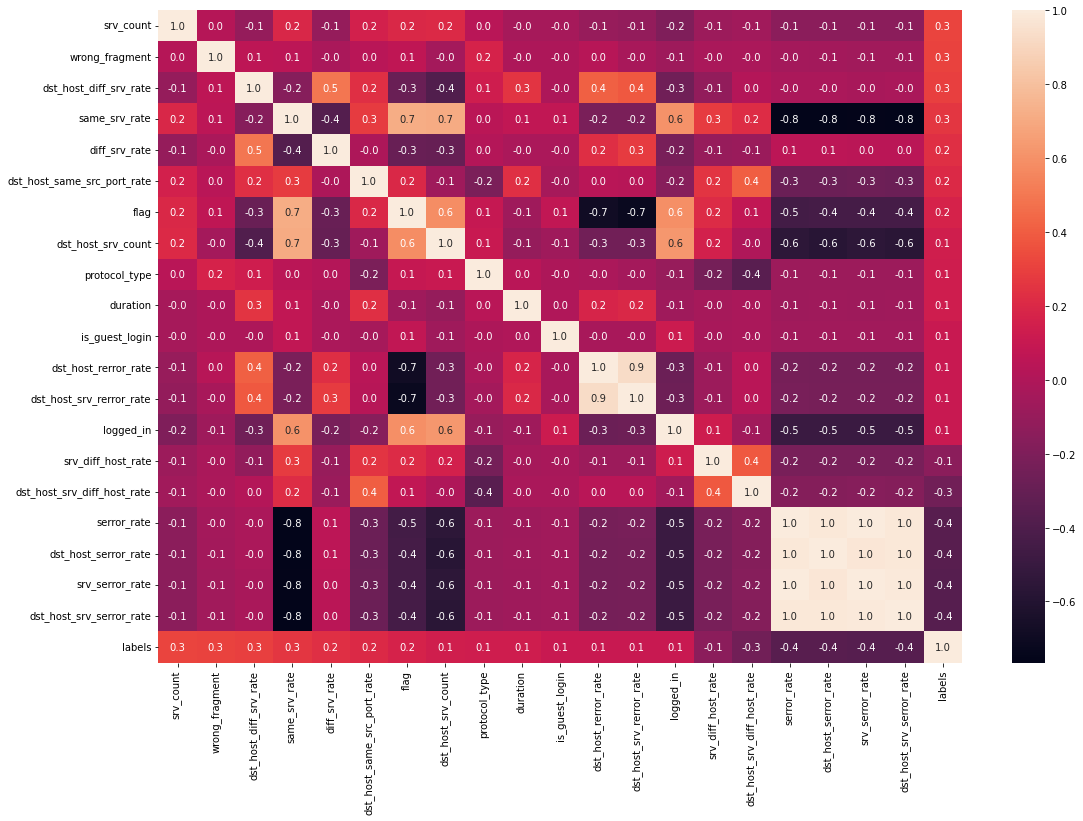

In [27]:
plt.figure(figsize=(18,12));
sns.heatmap(df1_train.corr(), annot=True, fmt='1.1f')

In [28]:
df1_train = df1_train.drop(columns=['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate', 
                                    'protocol_type', 'dst_host_diff_srv_rate', 'same_srv_rate', 'dst_host_srv_count', 
                                    'logged_in', 'diff_srv_rate', 'diff_srv_rate'])
df1_train.head()

,srv_count,wrong_fragment,dst_host_same_src_port_rate,flag,duration,is_guest_login,dst_host_rerror_rate,dst_host_srv_rerror_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate,labels
0,2,0,0.17,9,0,0,0.05,0.00,0.00,0.00,11
1,1,0,0.88,9,0,0,0.00,0.00,0.00,0.00,11
2,6,0,0.00,5,0,0,0.00,0.00,0.00,0.00,9
3,5,0,0.03,9,0,0,0.00,0.01,0.00,0.04,11
4,32,0,0.00,9,0,0,0.00,0.00,0.09,0.00,11


In [29]:
df1_test = df1_test.drop(columns=['serror_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate', 
                                   'protocol_type', 'dst_host_diff_srv_rate', 'same_srv_rate', 'dst_host_srv_count', 
                                   'logged_in', 'diff_srv_rate', 'diff_srv_rate'])
df1_test.head()

,srv_count,wrong_fragment,dst_host_same_src_port_rate,flag,duration,is_guest_login,dst_host_rerror_rate,dst_host_srv_rerror_rate,srv_diff_host_rate,dst_host_srv_diff_host_rate,labels
0,1,0,0.01,9,5,0,0.87,0.0,0.00,0.04,11
1,269,0,0.01,9,0,0,0.00,0.0,0.01,0.00,11
2,121,0,0.01,9,0,0,0.00,0.0,0.00,0.00,11
3,2,0,1.00,9,1979,0,0.00,0.0,0.00,0.00,11
4,2,0,1.00,4,14462,0,1.00,1.0,0.00,0.00,15


In [30]:
x_train = df1_train.drop(columns = ['labels'])
y_train = df1_train['labels']

x_test = df1_test.drop(columns = ['labels'])
y_test = df1_test['labels']

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9872432981670676
0.8871983676366217


In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 25)
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9873068038389179
0.8871540099361249
